# Global Plastic Pollution Analysis

#### import libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline 

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

#### reading dataset 

In [2]:
df = pd.read_csv('per-capita-plastic-waste-vs-gdp-per-capita.csv')
df

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN
48166,Zimbabwe,ZWE,2019,NaN,NaN,14645000.0,NaN


#### displaying first 5 rows 

In [3]:
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


#### shape of data 

In [4]:
df.shape

(48168, 7)

#### checking null values in data

In [5]:
df.isnull().sum()

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

#### checking percentage of null values in each column 

In [6]:
for column in df.columns:
    print("{} has {:.2f}% null values: ".format(column, (df[column].isnull().sum() / len(df)) * 100 ))
    print("-" * 50)

Entity has 0.00% null values: 
--------------------------------------------------
Code has 4.18% null values: 
--------------------------------------------------
Year has 0.00% null values: 
--------------------------------------------------
Per capita plastic waste (kg/person/day) has 99.61% null values: 
--------------------------------------------------
GDP per capita, PPP (constant 2011 international $) has 86.70% null values: 
--------------------------------------------------
Total population (Gapminder, HYDE & UN) has 2.67% null values: 
--------------------------------------------------
Continent has 99.41% null values: 
--------------------------------------------------


#### checking info of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


#### renaming column names 

In [8]:
df.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)

In [9]:
df.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


#### removing entities/countries with incomplete/missing data

In [10]:
incmp_df_idx = df[(df['Total Population'].isna()) & (df['GDP per capita in PPP'].isna())].index
df.drop(incmp_df_idx, inplace=True)

In [11]:
df.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


#### shape of data

In [12]:
df.shape

(48113, 7)

#### retrieving rows in which year == 2010

In [13]:
df_2010 = df[df['Year'] == 2010]
df_2010 = df_2010.drop(columns='Continent')

In [14]:
df_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


#### retrieving continent name in which year == 2015

In [15]:
df_2015 = df[df['Year'] == 2015]
df_2010['Continent'] = df_2015['Continent'].values

In [16]:
df_2015.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe
589,Algeria,DZA,2015,NaN,13724.723853,3.972800e+07,Africa
849,American Samoa,ASM,2015,NaN,NaN,5.600000e+04,Oceania


#### dropping rows with missing Continent values using index

In [17]:
df_2010 = df_2010[df_2010['Waste per person(kg/day)'].notna()]
wa_g = df_2010.reset_index().drop('index', axis=1)

In [18]:
wa_g.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


#### reading 2nd file 

In [19]:
df2 = pd.read_csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')
df2

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN
48166,Zimbabwe,ZWE,2019,NaN,NaN,14645000.0,NaN


#### displaying first 5 rows of df2

In [20]:
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


#### renaming columns

In [21]:
df2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                  'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                  'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)

#### dropping Continent column

In [22]:
df2.drop('Continent', axis=1, inplace=True)

#### retrieving rows in which year == 2010

In [23]:
df2_2010 = df2[df2.Year == 2010]
df2_2010.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


#### dropping rows with missing mismanaged waste values

In [24]:
df2_2010 = df2_2010[df2_2010['Mismanaged waste per person(kg/day)'].isna() != True]

#### reset index

In [25]:
w_m = df2_2010.reset_index().drop('index', axis=1)
w_m.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0


#### merging w_m and wa_g 

In [26]:
df_plastic_waste = pd.merge(wa_g, w_m, how='inner')
df_plastic_waste

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051
...,...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.252,17082.404659,3359000.0,South America,0.024
177,Vanuatu,VUT,2010,0.295,2948.032937,236000.0,Oceania,0.245
178,Venezuela,VEN,2010,0.252,16544.972055,28440000.0,South America,0.017
179,Vietnam,VNM,2010,0.103,4408.168612,87968000.0,Asia,0.090


#### displaying data

In [27]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051


#### converting column names into list

In [28]:
df_plastic_waste.columns.tolist()

['Entity',
 'Code',
 'Year',
 'Waste per person(kg/day)',
 'GDP per capita in PPP',
 'Total Population',
 'Continent',
 'Mismanaged waste per person(kg/day)']

#### column names 

In [29]:
col_names = ['Entity','Code','Year','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']

In [30]:
df_plastic_waste = df_plastic_waste[col_names]
df_plastic_waste

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,0.032,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,0.086,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,0.045,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,0.010,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,0.051,19212.720131,88000.0,North America
...,...,...,...,...,...,...,...,...
176,Uruguay,URY,2010,0.252,0.024,17082.404659,3359000.0,South America
177,Vanuatu,VUT,2010,0.295,0.245,2948.032937,236000.0,Oceania
178,Venezuela,VEN,2010,0.252,0.017,16544.972055,28440000.0,South America
179,Vietnam,VNM,2010,0.103,0.090,4408.168612,87968000.0,Asia


#### rounding the values per person

In [31]:
df_plastic_waste.iloc[:, 3:5] = np.around(df_plastic_waste[['Waste per person(kg/day)', 
                                                            'Mismanaged waste per person(kg/day)']], decimals=2)
df_plastic_waste.iloc[:, 3:5]

,Waste per person(kg/day),Mismanaged waste per person(kg/day)
0,0.07,0.03
1,0.14,0.09
2,0.06,0.04
3,0.25,0.01
4,0.66,0.05
...,...,...
176,0.25,0.02
177,0.30,0.24
178,0.25,0.02
179,0.10,0.09


#### changing data type

In [32]:
df_plastic_waste['Total Population'] = df_plastic_waste['Total Population'].astype(int)
df_plastic_waste['Total Population']

0       2948000
1      35977000
2      23356000
3         13000
4         88000
         ...   
176     3359000
177      236000
178    28440000
179    87968000
180    23155000
Name: Total Population, Length: 181, dtype: int32

#### Generating Total waste and Total mismanaged waste by country

In [33]:
df_plastic_waste['Total waste(kgs/year)'] = ((df_plastic_waste['Waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)
df_plastic_waste['Total waste mismanaged(kgs/year)'] = ((df_plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)

In [34]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06


#### scatter plot graph

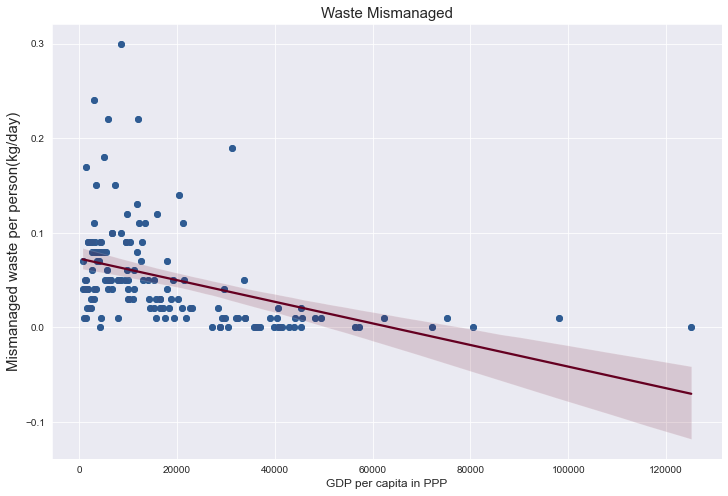

In [35]:
plt.figure(1, figsize=(12,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Mismanaged waste per person(kg/day)'])
plt.title('Waste Mismanaged', loc='center', fontsize=15)
plt.ylabel('Mismanaged waste', loc='center', fontsize=15)
plt.xlabel('GDP per capita', fontsize=12)

sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=df_plastic_waste,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})

plt.show()

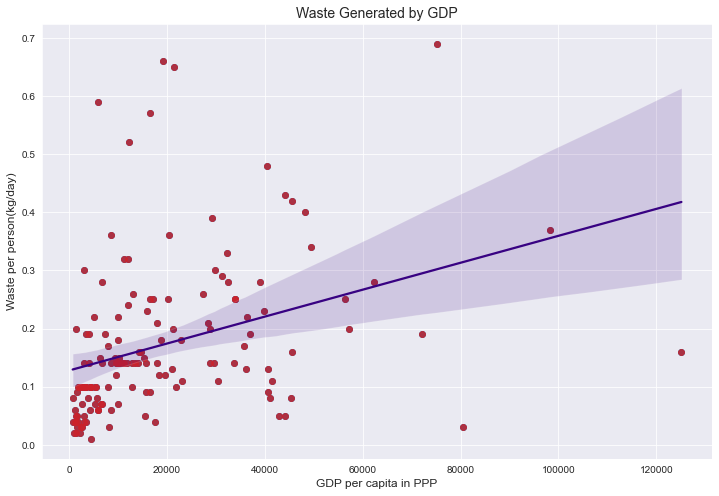

In [36]:
plt.figure(2, figsize=(12,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x=df_plastic_waste['GDP per capita in PPP'], y=df_plastic_waste['Waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})

plt.show()